# Árboles de decisión

## Procesado de los datos

El conjunto de datos sobre reconocimiento de vinos está incluido en *Scikit-learn*, se obtiene usando la función `load_wine` incluida en la librería `sklearn.datasets`. Este conjunto de datos contiene 178 ejemplos de distintas variedades de vino, con 13 características y tres clasificaciones posibles.

In [156]:
from sklearn.datasets import load_wine

wine = load_wine()

Este conjunto de datos es un diccionario con varios campos:
* `data`: Es el conjunto de datos, se trata de un array en el que cada componente es un array con las características de cada instancia.
* `target`: Es el conjunto de valores de clasificación para cada instancia. Es un array del mismo tamaño que `data`, en el que se indica el valor de clasificación de cada instancia, en el mismo orden en que éstas se encuentran en el array `data`.
* `DESCR`: Es una descripción del conjunto de datos.
* `target_names`: Es un array con los nombres de cada valor de clasificación.
* `feature_names`: Es un array con los nombres de cada característica.

Almacenamos los datos en las variables `X_data`, `y_data`, `X_names` e `y_names`.

In [157]:
X_data, y_data, X_names, y_names = \
    wine.data, wine.target, wine.feature_names, wine.target_names

## Contenido del ejercicio

El ejercicio consiste en
* Realizar una separación del conjunto de instancias en conjunto de entrenamiento (70%) y conjunto de prueba (30%).
* Construir un árbol de decisión sin poda para el conjunto de entrenamiento y evaluar su rendimiento en el conjunto de prueba.
* Realizar alguna poda a posteriori en este árbol de decisión, buscando mejorar su rendimiento en el conjunto de prueba.
* Buscar la combinación de valores para los parámetros (evaluar al menos 3 parámetros por separado o simultáneamente) que permiten realizar una poda en la construcción del árbol de decisión (prepoda) con mejor efecto en el rendimiento en el conjunto de prueba.
* Evaluar algún método de *ensemble learning* para árboles de decisión con el conjunto de entrenamiento, buscando mejorar el rendimiento en el conjunto de prueba.

El **desarrollo tiene que estar razonado**, indicando en cada apartado qué se está haciendo, **demostrando así el conocimiento adquirido en este módulo**. ¿Qué conclusiones puedes sacar de lo aprendido sobre árboles de decisión?

# Inicio del ejercicio

## 1. Realizar una separación del conjunto de instancias en conjunto de entrenamiento (70%) y conjunto de prueba (30%).

Utilizamos el método train_test_split de la librería sklearn para dividir el conjunto de instancias en conjunto de entrenamiento y conjunto de prueba, asignandole al conjunto de prueba un tamaño del 30% del total con el parámetro test_size.

In [158]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=4861,stratify=y_data)

## 2. Construir un árbol de decisión sin poda para el conjunto de entrenamiento y evaluar su rendimiento en el conjunto de prueba.

Para construir el árbol, importamos la función `DecisionTreeClassifier` de sklearn.tree.
A continuación, entrenamos el modelo con el conjunto de entrenamiento y, seguidamente, evaluamos el rendimiento del modelo con el método `score`.

In [160]:
from sklearn.tree import DecisionTreeClassifier

tree1_clf = DecisionTreeClassifier().fit(x_train, y_train)
tree1_clf.score(x_test, y_test)

0.9629629629629629

Voy a representar el árbol para apreciarlo mejor.

<Figure size 432x288 with 0 Axes>

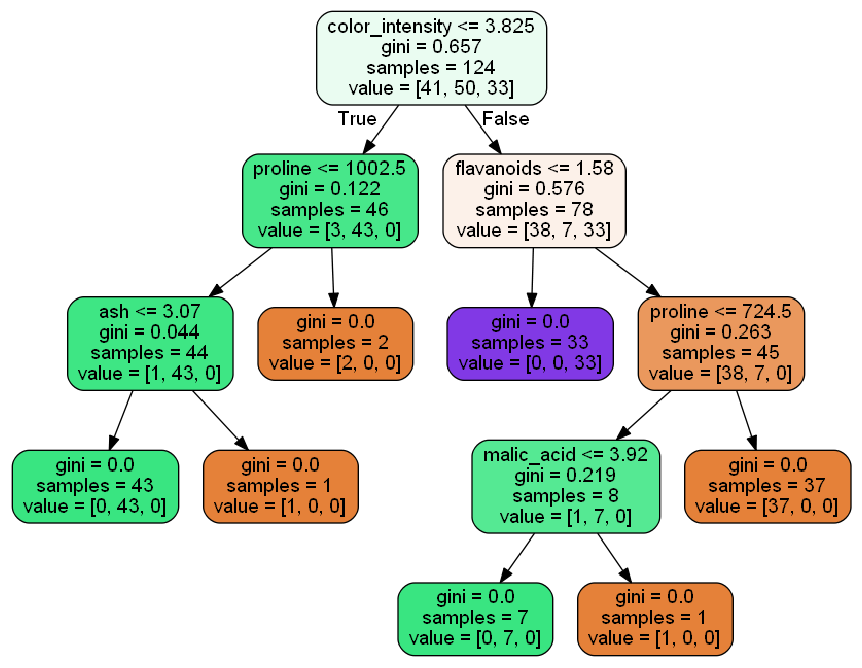

In [161]:
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
def show_tree(tree1_clf,features):
    export_graphviz(
        tree1_clf,
        out_file="tree1_clf.dot",
        feature_names=features,
        rounded=True,
        filled=True)
    !"C:\Program Files (x86)\Graphviz2.38\bin\dot" -Tpng tree1_clf.dot -o tree1_clf.png
    plt.clf()
    dpi = 70
    image = plt.imread("tree1_clf.png")
    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    
show_tree(tree1_clf,wine.feature_names)

Rendimientos para los distintos conjuntos:

In [162]:
print("Rendimiento en el conjunto de entrenamiento: ",tree1_clf.score(x_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree1_clf.score(x_test,y_test))
print("Rendimiento en el conjunto total: ",tree1_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.9629629629629629
Rendimiento en el conjunto total:  0.9887640449438202


Podemos observar que para el conjunto de entrenamiento tiene una puntuación de 1.0, por lo que podemos pensar que se ha producido un sobreajuste.

## 3. Realizar alguna poda a posteriori en este árbol de decisión, buscando mejorar su rendimiento en el conjunto de prueba.

Primero imprimo las características del árbol para ehcarles un vistazo:

In [163]:
print(tree1_clf.tree_.node_count)
print(tree1_clf.tree_.children_right)
print(tree1_clf.tree_.children_left)

13
[ 6  5  4 -1 -1 -1  8 -1 12 11 -1 -1 -1]
[ 1  2  3 -1 -1 -1  7 -1  9 10 -1 -1 -1]


A continuación hago una copia del árbol inicial para poder trabajar sobre ella sin perder el original:

In [164]:
from copy import deepcopy

tree1A_clf = deepcopy(tree1_clf)

Voy a convertir en nodos hoja los nodos 1 y 9: 

<Figure size 432x288 with 0 Axes>

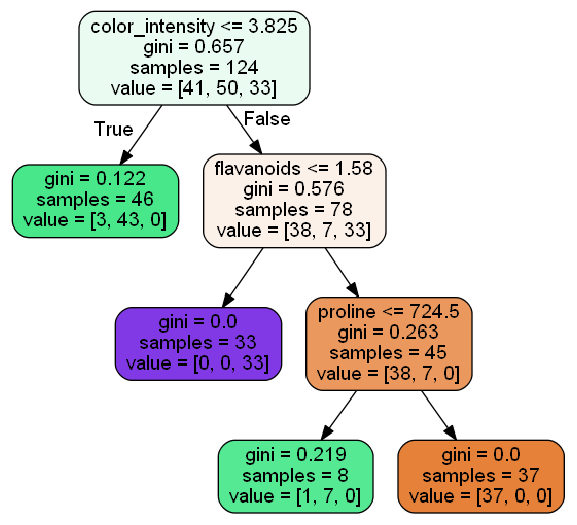

In [165]:
tree1A_clf.tree_.children_left[1] = -1
tree1A_clf.tree_.children_right[1] = -1
tree1A_clf.tree_.feature[1] = -2

tree1A_clf.tree_.children_left[9] = -1
tree1A_clf.tree_.children_right[9] = -1
tree1A_clf.tree_.feature[9] = -2

show_tree(tree1A_clf,wine.feature_names)

Los valores son iguales:

In [166]:
print("Original: ",tree1_clf.score(x_test,y_test))
print("Podado 1 y 9: ",tree1A_clf.score(x_test,y_test))

Original:  0.9629629629629629
Podado 1 y 9:  0.9629629629629629


Ahora pruebo con 1 y 8:

In [167]:
tree2A_clf = deepcopy(tree1_clf)

tree2A_clf.tree_.children_left[1] = -1
tree2A_clf.tree_.children_right[1] = -1
tree2A_clf.tree_.feature[1] = -2

tree2A_clf.tree_.children_left[8] = -1
tree2A_clf.tree_.children_right[8] = -1
tree2A_clf.tree_.feature[8] = -2

Los valores disminuyen:

In [168]:
print("Original: ",tree1_clf.score(x_test,y_test))
print("Podado 1 y 8: ",tree2A_clf.score(x_test,y_test))

Original:  0.9629629629629629
Podado 1 y 8:  0.9074074074074074


Sólo el 8:

In [169]:
tree3A_clf = deepcopy(tree1_clf)

tree3A_clf.tree_.children_left[8] = -1
tree3A_clf.tree_.children_right[8] = -1
tree3A_clf.tree_.feature[8] = -2

print("Original: ",tree1_clf.score(x_test,y_test))
print("Podado 8: ",tree3A_clf.score(x_test,y_test))

Original:  0.9629629629629629
Podado 8:  0.9074074074074074


Poda de 2 y 8:

Original:  0.9629629629629629
Podado 2 y 8:  0.9074074074074074


<Figure size 432x288 with 0 Axes>

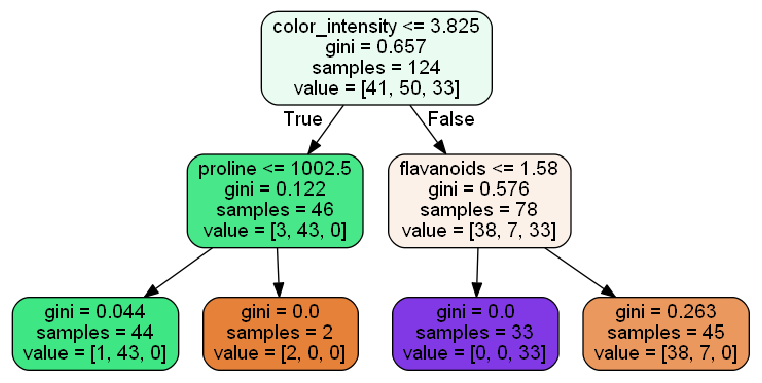

In [170]:
tree4A_clf = deepcopy(tree1_clf)

tree4A_clf.tree_.children_left[2] = -1
tree4A_clf.tree_.children_right[2] = -1
tree4A_clf.tree_.feature[2] = -2

tree4A_clf.tree_.children_left[8] = -1
tree4A_clf.tree_.children_right[8] = -1
tree4A_clf.tree_.feature[8] = -2

print("Original: ",tree1_clf.score(x_test,y_test))
print("Podado 2 y 8: ",tree4A_clf.score(x_test,y_test))

show_tree(tree4A_clf,wine.feature_names)

Tras varias combinaciones de podas no parece que se pueda aumentar el valor de la puntuación en el conjunto de prueba.
Al eliminar las hojas del nodo 8 disminuye el score, y al eliminar las hojas de los nodos 1, 2 o 9 el score se mantiene.

## 4. Buscar la combinación de valores para los parámetros (evaluar al menos 3 parámetros por separado o simultáneamente) que permiten realizar una poda en la construcción del árbol de decisión (prepoda) con mejor efecto en el rendimiento en el conjunto de prueba.

### Probamos primero con el parámetro `max_depth`, que limita la profundidad del árbol:

<Figure size 432x288 with 0 Axes>

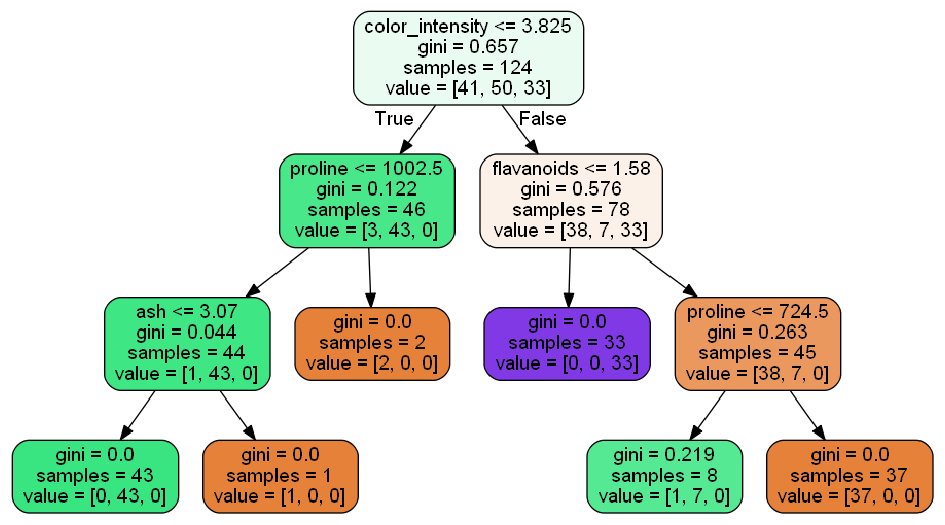

In [171]:
tree_clf_pre1 = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)
show_tree(tree_clf_pre1,wine.feature_names)

In [172]:
print("Rendimiento en el conjunto de entrenamiento: ",tree_clf_pre1.score(x_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree_clf_pre1.score(x_test,y_test))
print("Rendimiento en el conjunto total: ",tree_clf_pre1.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9919354838709677
Rendimiento en el conjunto de prueba:  0.9629629629629629
Rendimiento en el conjunto total:  0.9831460674157303


En este caso, la diferencia respecto al árbol que no utiliza la opción de max_depth con el valor indicado es que el nuevo árbol pierde dos nodos hoja que tenia a profundida 4. El rendimiento del conjunto de entrenamiento disminuye, el de prueba se mantiene y el del conjunto total disminuye.

### Probamos ahora con el parámetro `max_leaf_nodes`, que limita la cantidad de nodos hoja del árbol:

<Figure size 432x288 with 0 Axes>

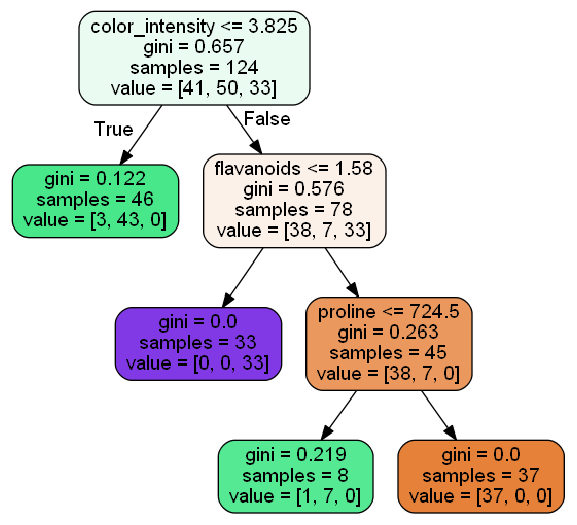

In [173]:
tree_clf_pre2 = DecisionTreeClassifier(max_leaf_nodes = 4).fit(x_train, y_train)
show_tree(tree_clf_pre2,wine.feature_names)

In [174]:
print("Rendimiento en el conjunto de entrenamiento: ",tree_clf_pre2.score(x_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree_clf_pre2.score(x_test,y_test))
print("Rendimiento en el conjunto total: ",tree_clf_pre2.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.967741935483871
Rendimiento en el conjunto de prueba:  0.9629629629629629
Rendimiento en el conjunto total:  0.9662921348314607


### Por último, probamos con el parámetro `min_impurity_split`, que establece un nivel mínimo de impureza que los nodos deben superar para no ser considerados nodos hoja:

D:\Programas\ANACONDA\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


<Figure size 432x288 with 0 Axes>

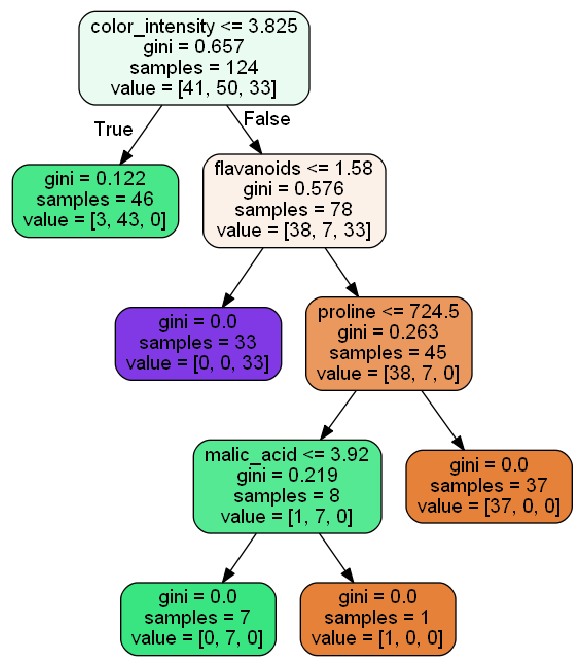

In [175]:
tree_clf_pre3 = DecisionTreeClassifier(min_impurity_split=0.15).fit(x_train, y_train)
show_tree(tree_clf_pre3,wine.feature_names)

In [176]:
print("Rendimiento en el conjunto de entrenamiento: ",tree_clf_pre3.score(x_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree_clf_pre3.score(x_test,y_test))
print("Rendimiento en el conjunto total: ",tree_clf_pre3.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9758064516129032
Rendimiento en el conjunto de prueba:  0.9629629629629629
Rendimiento en el conjunto total:  0.9719101123595506


Durante los tres ejemplos utilizando parámetros distintos para realizar prepoda para los valores con los que se ha operado, se ha mantenido la puntuación de los modelos para el conjunto de prueba, mientras que disminuia la puntuación para los conjuntos de entrenamiento y completo.

## 5. Evaluar algún método de ensemble learning para árboles de decisión con el conjunto de entrenamiento, buscando mejorar el rendimiento en el conjunto de prueba.

### Random forest

Primero vamos a probar con el método de random forest. En primero lugar, importamos el método `RandomForestClassifier` de `ensemble` en `sklearn`:

In [177]:
from sklearn.ensemble import RandomForestClassifier

Ahora creamos un clsificador de random forest con 7 árboles:

In [185]:
forest = RandomForestClassifier(n_estimators=7)

Ahora lo entrenamos con el método `fit`:

In [186]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [187]:
print("Rendimiento en el conjunto de entrenamiento: ",forest.score(x_train,y_train))
print("Rendimiento en el conjunto de prueba: ",forest.score(x_test,y_test))
print("Rendimiento en el conjunto total: ",forest.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.9814814814814815
Rendimiento en el conjunto total:  0.9943820224719101


Podemos ver que tiene un 100% de acierto para el conjunto de entrenamiento, por lo que es bastante probable que se haya producido un sobreajuste pero, por otra parte, en el conjunto de prueba el porcentaje de acierto ha aumentado hasta el 98%, unos 2 puntos con respecto a los resultados de utilizar un único árbol.

In [193]:
forest2 = RandomForestClassifier(n_estimators=7, max_depth=3)
forest2.fit(x_train,y_train)
print("Rendimiento en el conjunto de entrenamiento: ",forest2.score(x_train,y_train))
print("Rendimiento en el conjunto de prueba: ",forest2.score(x_test,y_test))
print("Rendimiento en el conjunto total: ",forest2.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9919354838709677
Rendimiento en el conjunto de prueba:  0.9814814814814815
Rendimiento en el conjunto total:  0.9887640449438202


En este segundo caso, podemos observar como, limitando la profundidad de los árboles a 3, hemos conseguido mantener el score del conjunto de prueba mientras hacemos que el del conjunto de entrenamiento no sea 100, siendo así menos probable que exista sobreajuste.

### Gradient Boosting

Ahora vamos a probar con el método de Gradient Boosting:

Importamos el método `GradientBoostingClassifier` de `ensemble` en `sklearn`, creamos un modelo con 7 árboles y lo entrenamos:

In [189]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(n_estimators=7)
gradient.fit(x_train,y_train);

A continuación, mostramos las puntuaciones para los conjuntos:

In [190]:
print("Rendimiento en el conjunto de entrenamiento: ",gradient.score(x_train,y_train))
print("Rendimiento en el conjunto de prueba: ",gradient.score(x_test,y_test))
print("Rendimiento en el conjunto total: ",gradient.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.9074074074074074
Rendimiento en el conjunto total:  0.9719101123595506


Ahora vamos a crear otro modelo con prepoda:

In [191]:
gradient2 = GradientBoostingClassifier(n_estimators=7, max_depth=1, learning_rate = 0.3)
gradient2.fit(x_train,y_train);
print("Rendimiento en el conjunto de entrenamiento: ",gradient2.score(x_train,y_train))
print("Rendimiento en el conjunto de prueba: ",gradient2.score(x_test,y_test))
print("Rendimiento en el conjunto total: ",gradient2.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9838709677419355
Rendimiento en el conjunto de prueba:  0.9814814814814815
Rendimiento en el conjunto total:  0.9831460674157303


Probando con distintos valores de `max_depth` y `learning_rate` hemos logrado conseguir el mismo nivel de aciertos en el conjunto de prueba que con random forest, pero menores niveles en los conjuntos de entrenamiento y total.